In [56]:
# Importar las bibliotecas necesarias para el procesamiento de imágenes
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


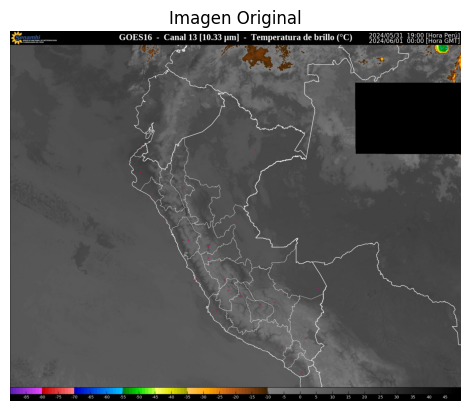

In [2]:
# Cargar la imagen desde un archivo
img_path = './imagenes_satelite/202406010000.jpg'  # Asegúrate de cambiar esto por la ruta correcta de tu imagen
img = Image.open(img_path)

# Mostrar la imagen original
plt.imshow(img)
plt.title("Imagen Original")
plt.axis('off')  # Omitir los ejes para una vista más limpia
plt.show()


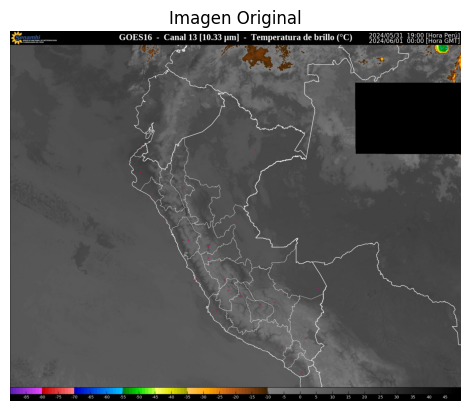

In [57]:
# Cargar la imagen desde un archivo
img_path = './imagenes_satelite/202406010000.jpg'  # Asegúrate de cambiar esto por la ruta correcta de tu imagen
img = Image.open(img_path)

# Mostrar la imagen original
plt.imshow(img)
plt.title("Imagen Original")
plt.axis('off')  # Omitir los ejes para una vista más limpia
plt.show()


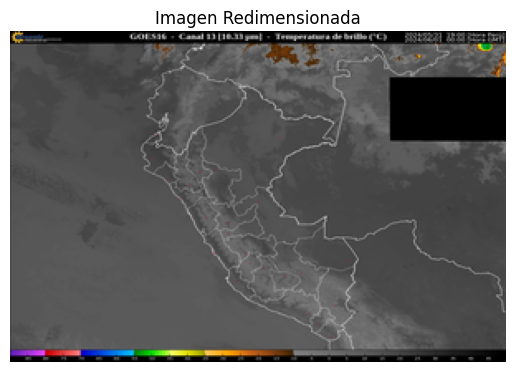

In [6]:
# Redimensionar la imagen a un tamaño deseado
new_size = (300, 200) 
img_resized = img.resize(new_size, Image.Resampling.LANCZOS)

# Mostrar la imagen redimensionada
plt.imshow(img_resized, cmap='gray')
plt.title("Imagen Redimensionada")
plt.axis('off')
plt.show()


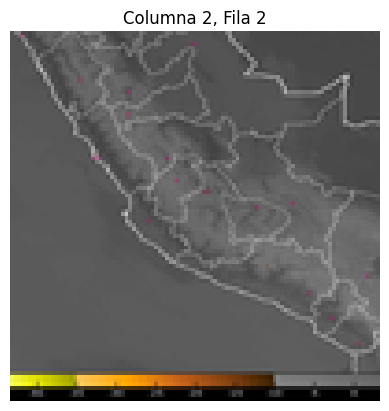

In [7]:
# Dividir la imagen en 3 columnas y 2 filas
width, height = img_resized.size
col_width = width // 3
row_height = height // 2

# Seleccionar la columna 2, fila 2
col_index = 1  # Columna 2 (índice base 0)
row_index = 1  # Fila 2 (índice base 0)
area = (col_index * col_width, row_index * row_height, (col_index + 1) * col_width, (row_index + 1) * row_height)
img_segment = img_resized.crop(area)

# Mostrar la sección seleccionada
plt.imshow(img_segment, cmap='gray')
plt.title("Columna 2, Fila 2")
plt.axis('off')
plt.show()


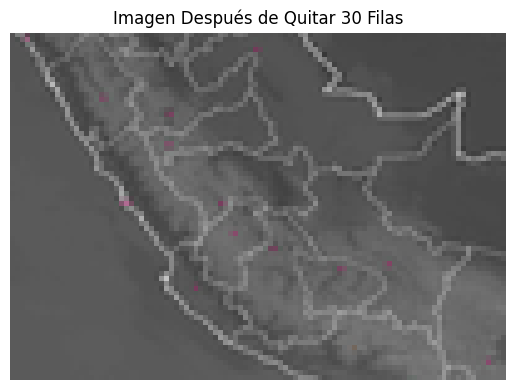

In [8]:
# Ajustar la altura y quitar las 30 primeras filas de píxeles desde la parte inferior
final_height = row_height - 30  # Nueva altura después de quitar 30 filas
img_cropped = img_segment.crop((0, 0, col_width, final_height))

# Mostrar la imagen después de quitar las filas
plt.imshow(img_cropped, cmap='gray')
plt.title("Imagen Después de Quitar 30 Filas")
plt.axis('off')
plt.show()


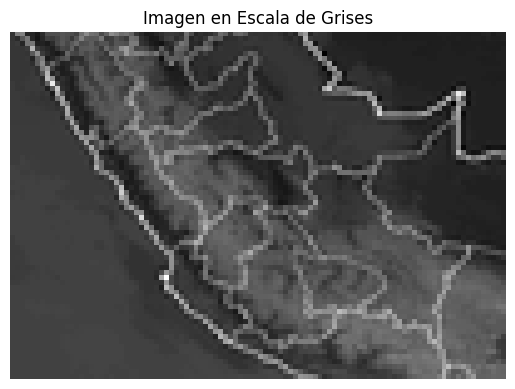

In [9]:
# Convertir la imagen segmentada a escala de grises
img_gray = img_cropped.convert('L')

# Mostrar la imagen en escala de grises
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')
plt.show()


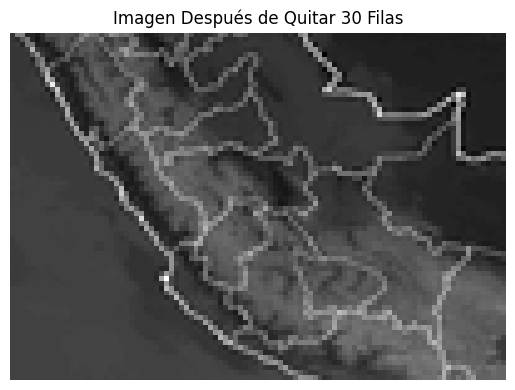

In [10]:
# Ajustar la altura y quitar las 30 primeras filas de píxeles desde la parte inferior
final_height = row_height - 30  # Nueva altura después de quitar 30 filas
img_cropped = img_gray.crop((0, 0, col_width, final_height))

# Mostrar la imagen después de quitar las filas
plt.imshow(img_cropped, cmap='gray')
plt.title("Imagen Después de Quitar 30 Filas")
plt.axis('off')
plt.show()


In [58]:
# Convertir la imagen final a un array de numpy
pixel_array = np.array(img_cropped)

# Calcular el valor medio de los píxeles
mean_pixel_value = pixel_array.mean()

# Clasificar la imagen según el valor medio de los píxeles
category = ''
if mean_pixel_value < 80:
    category = 'frío'
elif mean_pixel_value < 100:
    category = 'normal'
else:
    category = 'caliente'

# Mostrar los resultados de la clasificación
print(f"Valor medio de los píxeles: {mean_pixel_value:.2f}")
print(f"Categoría de la imagen: {category}")


Valor medio de los píxeles: 92.55
Categoría de la imagen: normal


In [59]:
# Importar las bibliotecas necesarias
import numpy as np
from PIL import Image
import os

# Configurar la ruta a la carpeta con imágenes
folder_path = './imagenes_satelite'  # 

# Configurar la ruta a la carpeta de destino donde se guardarán las imágenes
output_folder = './imgs_nuevo3'
os.makedirs(output_folder, exist_ok=True)  # Crea la carpeta si no existeD

# Configurar el nuevo tamaño de imagen deseado para el redimensionamiento
new_size = (300, 200)  # Asegúrate de definir un tamaño adecuado

# Diccionario para contar las categorías
categories_count = {'frío': 0, 'normal': 0, 'caliente': 0}

# Iterar sobre cada imagen en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Asegúrate de que estás procesando solo archivos .jpg
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        
        # Redimensionar la imagen
        img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
        
        # Dividir la imagen en 3 columnas y 2 filas y seleccionar la columna 2, fila 2
        width, height = img_resized.size
        col_width = width // 3
        row_height = height // 2
        col_index = 1
        row_index = 1
        area = (col_index * col_width, row_index * row_height, (col_index + 1) * col_width, (row_index + 1) * row_height)
        img_segment = img_resized.crop(area)
        
        # Convertir el segmento a escala de grises
        img_gray = img_segment.convert('L')
        
        # Quitar las 30 primeras filas de píxeles desde la parte inferior
        final_height = row_height - 30
        img_cropped = img_gray.crop((0, 0, col_width, final_height))
        
        # Convertir la imagen final a un array de numpy y calcular el valor medio
        pixel_array = np.array(img_cropped)
        mean_pixel_value = pixel_array.mean()
        
        # Clasificar la imagen según el valor medio de los píxeles
        category = ''
        if mean_pixel_value < 85:
            category = 'frío'
        elif mean_pixel_value < 100:
            category = 'normal'
        else:
            category = 'caliente'
        
        # Incrementar el contador de la categoría
        categories_count[category] += 1
        
        # Generar el nuevo nombre de archivo con la categoría
        base_filename, file_extension = os.path.splitext(filename)
        new_filename = f"{base_filename}_{category}{file_extension}"
        output_path = os.path.join(output_folder, new_filename)
        
        # Guardar la imagen procesada con el nuevo nombre
        img_cropped.save(output_path)
        
        # Imprimir el nombre de la imagen y su categoría
        print(f"Imagen: {new_filename} - Categoría: {category}")

# Mostrar el conteo de imágenes por categoría
print("\nConteo de imágenes por categoría:")
for category, count in categories_count.items():
    print(f"{category.capitalize()}: {count}")


Imagen: 202406081510_frío.jpg - Categoría: frío
Imagen: 202406180600_caliente.jpg - Categoría: caliente
Imagen: 202406061210_normal.jpg - Categoría: normal
Imagen: 202406031730_frío.jpg - Categoría: frío
Imagen: 202406131920_frío.jpg - Categoría: frío
Imagen: 202406061850_frío.jpg - Categoría: frío
Imagen: 202406082350_normal.jpg - Categoría: normal
Imagen: 202406070410_normal.jpg - Categoría: normal
Imagen: 202406120820_normal.jpg - Categoría: normal
Imagen: 202406191500_normal.jpg - Categoría: normal
Imagen: 202406140420_normal.jpg - Categoría: normal
Imagen: 202406132340_normal.jpg - Categoría: normal
Imagen: 202406160010_normal.jpg - Categoría: normal
Imagen: 202406160600_caliente.jpg - Categoría: caliente
Imagen: 202406050540_normal.jpg - Categoría: normal
Imagen: 202406150250_normal.jpg - Categoría: normal
Imagen: 202406160440_normal.jpg - Categoría: normal
Imagen: 202406172150_normal.jpg - Categoría: normal
Imagen: 202406071630_frío.jpg - Categoría: frío
Imagen: 202406032000_frí

In [66]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar la ruta a la carpeta con imágenes clasificadas
folder_path = './imgs_nuevo2'  # Carpeta donde se guardaron las imágenes procesadas

# Dimensiones deseadas para las imágenes
img_height, img_width = 100, 100  # Ajusta este tamaño según sea necesario

# Diccionario para convertir categorías en etiquetas
category_to_label = {'frío': 0, 'normal': 1, 'caliente': 2}

# Listas para almacenar imágenes y etiquetas
images = []
labels = []

# Función para cargar y procesar imágenes
def load_and_process_image(file_path, label):
    img = Image.open(file_path)
    img_resized = img.resize((img_width, img_height), Image.Resampling.LANCZOS)
    img_array = np.array(img_resized)
    images.append(img_array)
    labels.append(label)

# Iterar sobre cada imagen en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(folder_path, filename)
        # Inferir categoría desde el nombre del archivo (frío, normal, caliente)
        if "frío" in filename:
            load_and_process_image(img_path, category_to_label['frío'])
        elif "normal" in filename:
            load_and_process_image(img_path, category_to_label['normal'])
        elif "caliente" in filename:
            load_and_process_image(img_path, category_to_label['caliente'])

# Convertir listas a arrays numpy y preparar datos
images = np.array(images) / 255.0
labels = to_categorical(np.array(labels), num_classes=3)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [21]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
## Crear un generador de datos con aumento de datos para el entrenamiento
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest'
#)
#
## Crear un generador de datos para la validación (sin aumento, solo reescalar)
#validation_datagen = ImageDataGenerator(rescale=1./255)
#
## Suponiendo que 'images' y 'labels' son tus datos ya cargados y divididos
#train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
#validation_generator = validation_datagen.flow(X_test, y_test, batch_size=32)


In [61]:
import numpy as np

# Suponiendo que 'images' es tu array original de imágenes
# Asegúrate de que las imágenes tengan la forma adecuada
images = np.expand_dims(images, axis=-1)  # Añade una dimensión de canal

# Ahora 'images' debería tener la forma (num_samples, img_height, img_width, 1)


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplanar las imágenes
X_train = X_train.reshape((X_train.shape[0], img_height * img_width))
X_test = X_test.reshape((X_test.shape[0], img_height * img_width))

# Definir el modelo Denso
model = Sequential([
    Dense(512, activation='relu', input_shape=(img_height * img_width,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 clases: Fría, Normal, Caliente
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ajuste de Early Stopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7361 - loss: 0.6626 - val_accuracy: 0.7674 - val_loss: 0.4064
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8212 - loss: 0.3510 - val_accuracy: 0.9535 - val_loss: 0.1146
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9411 - loss: 0.1574 - val_accuracy: 0.9674 - val_loss: 0.1000
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9543 - loss: 0.1254 - val_accuracy: 0.9752 - val_loss: 0.0749
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9546 - loss: 0.1207 - val_accuracy: 0.9814 - val_loss: 0.0562
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9588 - loss: 0.1082 - val_accuracy: 0.9566 - val_loss: 0.0896
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9568 - loss: 0.1072 - val_accuracy: 0.9798 - val_loss: 0.0489
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9611 - loss: 0.1053 - val_accuracy: 0.9876 - v

In [51]:
#import numpy as np
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
#
## Simular la carga de imágenes en escala de grises (esto deberías reemplazarlo por tu carga real de datos)
#images = np.random.rand(1000, 100, 100, 1)  # 1000 imágenes de 100x100 píxeles en escala de grises
#labels = np.random.randint(0, 3, 1000)  # 1000 etiquetas para 3 clases
#
## Convertir etiquetas a formato categórico
#labels = to_categorical(labels, num_classes=3)
#
## Dividir los datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [63]:
model = Sequential([
    Flatten(input_shape=(100, 100, 1)),
    Dense(512, activation='relu'),  # Capa más grande
    Dropout(0.5),
    Dense(256, activation='relu'),  # Incremento en el número de neuronas
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/mermitas/Escritorio/python/procemiento/trabajo_final/procesamiento_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#import os
#import numpy as np
#from PIL import Image
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras.regularizers import l1_l2
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#
## Configuraciones iniciales
#folder_path = './imgs_nuevo2'
#img_height, img_width = 100, 100
#category_to_label = {'frío': 0, 'normal': 1, 'caliente': 2}
#
## Cargar y procesar imágenes
#images = []
#labels = []
#
#for filename in os.listdir(folder_path):
#    if filename.endswith(".jpg"):
#        img_path = os.path.join(folder_path, filename)
#        img = Image.open(img_path).resize((img_width, img_height))
#        img_array = np.array(img)
#        images.append(img_array)
#        label = filename.split('_')[-1].split('.')[0]  # Asume que el nombre del archivo contiene la etiqueta al final
#        labels.append(category_to_label[label])
#
#images = np.array(images) / 255.0
#images = np.expand_dims(images, axis=-1)  # Añade una dimensión de canal
#labels = to_categorical(np.array(labels), num_classes=3)
#
## Dividir los datos
#X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
#
## Generador de datos
#train_datagen = ImageDataGenerator(
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest'
#)
#
## Definir y compilar el modelo
#model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
#    MaxPooling2D(2, 2),
#    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
#    MaxPooling2D(2, 2),
#    Flatten(),
#    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
#    Dropout(0.5),
#    Dense(3, activation='softmax')
#])
#
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#
## Entrenamiento
#callbacks = [EarlyStopping(monitor='val_loss', patience=3), ModelCheckpoint('best_model.keras', save_best_only=True)]
#history = model.fit(
#    train_datagen.flow(X_train, y_train, batch_size=32),
#    epochs=10,
#    validation_data=(X_test, y_test),
#    callbacks=callbacks
#)
#

In [68]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9895 - loss: 0.0240
Loss: 0.024729540571570396, Accuracy: 0.9906976819038391


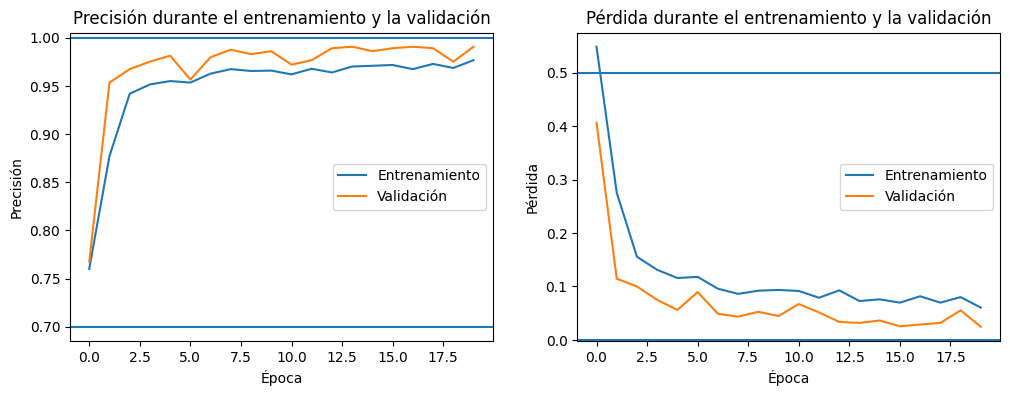

In [69]:
import matplotlib.pyplot as plt

# Graficar el accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.axhline(y=0.7 )
plt.axhline(y=1.0)
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.axhline(y=0.5 )
plt.axhline(y=0.0)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

# Mostrar las gráficas
plt.show()


In [77]:
from PIL import Image
import numpy as np

# Configurar la ruta a la nueva imagen
test_image_path = './imagenes_satelite/202406010000.jpg'  

# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(file_path, img_height, img_width):
    img = Image.open(file_path)
    img_resized = img.resize((img_width, img_height), Image.Resampling.LANCZOS)
    img_gray = img_resized.convert('L')
    img_array = np.array(img_gray)
    img_normalized = img_array / 255.0
    img_final = img_normalized.reshape(1, img_height, img_width, 1)  
    return img_final

# Preprocesar la imagen
img_height, img_width = 100, 100  
test_image = load_and_preprocess_image(test_image_path, img_height, img_width)


In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,855,371 (60.48 MB)

 Trainable params: 5,285,123 (20.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,570,248 (40.32 MB)

In [83]:
# Asegúrate de que la imagen tenga la forma correcta
test_image = test_image.reshape(1, 100*100)

# Hacer una predicción con el modelo
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions, axis=1)

# Mapear las clases a etiquetas
label_to_category = {0: 'frío', 1: 'normal', 2: 'caliente'}
predicted_label = label_to_category[predicted_class[0]]

print(f"La imagen fue clasificada como: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
La imagen fue clasificada como: normal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


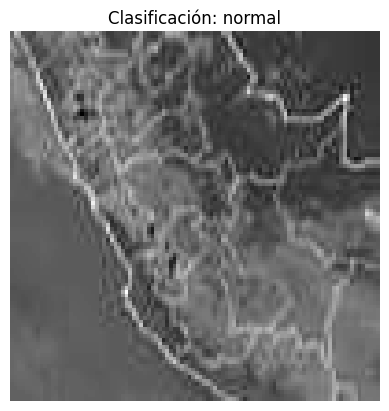

[[0. 1. 0.]]


In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Tomar una muestra del conjunto de prueba
muestra = X_test[0]

# Remodelar la muestra para que sea compatible con el modelo
muestra_reshaped = muestra.reshape(1, 100 * 100)  # Añadir la dimensión del lote y aplanar

# Hacer una predicción con el modelo
prediccion = model.predict(muestra_reshaped)

# Obtener la clase predicha
clase_predicha = np.argmax(prediccion)

# Crear un array de ceros con la misma forma que la predicción
output = np.zeros_like(prediccion)

# Asignar 1 a la clase predicha
output[0, clase_predicha] = 1

# Mapeo de clases a etiquetas
label_to_category = {0: 'frío', 1: 'normal', 2: 'caliente'}
predicted_label = label_to_category[clase_predicha]

# Mostrar la imagen
plt.imshow(muestra.reshape(100, 100), cmap="gray")
plt.title(f"Clasificación: {predicted_label}")
plt.axis('off')  # Ocultar los ejes
plt.show()

print(output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


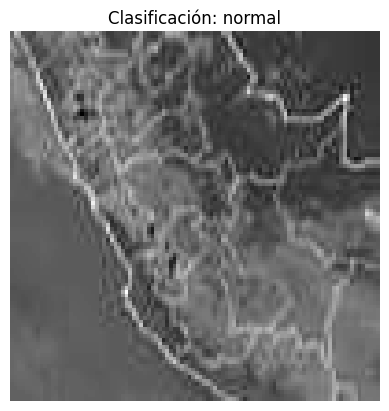

Probabilidades normalizadas: [[0.21220057 0.5757888  0.21201065]]
Array de clase resultante: [[0. 1. 0.]]


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

muestra = X_test[0]
plt.imshow(muestra.reshape(100, 100), cmap="gray")

muestra_reshaped = muestra.reshape(1, 100 * 100)

prediccion = model.predict(muestra_reshaped)
prediccion_normalizada = softmax(prediccion)

clase_predicha = np.argmax(prediccion_normalizada)
output = np.zeros_like(prediccion_normalizada)
output[0, clase_predicha] = 1

label_to_category = {0: 'frío', 1: 'normal', 2: 'caliente'}
predicted_label = label_to_category[clase_predicha]

plt.title(f"Clasificación: {predicted_label}")
plt.axis('off')
plt.show()

print("Probabilidades normalizadas:", prediccion_normalizada)
print("Array de clase resultante:", output)
